In [39]:
import pandas as pd


csv_path = r"\\tsclient\D\Siyu Zhao\data\Auckland region park\matched_data_100.csv"
df = pd.read_csv(csv_path)

print(df["leisure"].value_counts(dropna=False))
print(df["natural"].value_counts(dropna=False))


C:\Users\Siyu\AppData\Local\Temp\2\ipykernel_11420\2786966662.py:5: DtypeWarning: Columns (23,44,54) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


leisure
NaN               86710
park              31037
playground         1179
nature_reserve      155
Name: count, dtype: int64
natural
NaN              93804
beach            11976
bay               8052
wetland           2882
peak              1405
valley             785
cave_entrance      177
Name: count, dtype: int64


In [ ]:
# Bluespace = beach, bay
# Managed Greenspace =	wetland, park, playground, nature_reserve
# Mountainous Terrain =	peak, valley, cave_entrance


import pandas as pd

csv_path = r"\\tsclient\D\Siyu Zhao\data\Auckland region park\matched_data_100.csv"
df = pd.read_csv(csv_path)

df["datetime"] = pd.to_datetime(df["datetime"], errors='coerce', utc=True)
df["leaving_datetime"] = pd.to_datetime(df["leaving_datetime"], errors='coerce', utc=True)


df["stay_duration_min"] = (df["leaving_datetime"] - df["datetime"]).dt.total_seconds() / 60


df = df[df["stay_duration_min"] > 0]


print(df[["uid", "datetime", "leaving_datetime", "stay_duration_min", "name"]].head())
output_path = r"\\tsclient\D\Siyu Zhao\data\Auckland region park\stay_duration_min_100.csv"
df_filtered.to_csv(output_path, index=False, encoding='utf-8-sig')


C:\Users\Siyu\AppData\Local\Temp\2\ipykernel_11420\4089049797.py:4: DtypeWarning: Columns (23,44,54) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


                                        uid                  datetime  \
0  0001ebc00454fd08b2f233205c357b1f35a8a5fe 2019-05-16 06:03:57+00:00   
1  0004ec53405b3ce3052846a0519058689fc839af 2020-09-27 04:09:32+00:00   
2  0004ec53405b3ce3052846a0519058689fc839af 2020-09-27 04:14:39+00:00   
3  0004ec53405b3ce3052846a0519058689fc839af 2020-09-27 04:21:23+00:00   
4  0004ec53405b3ce3052846a0519058689fc839af 2020-09-27 04:33:30+00:00   

           leaving_datetime  stay_duration_min                name  
0 2019-05-16 08:28:33+00:00         144.600000         Piha Domain  
1 2020-09-27 04:14:39+00:00           5.116667         Piha Domain  
2 2020-09-27 04:21:23+00:00           6.733333                 NaN  
3 2020-09-27 04:27:27+00:00           6.066667                 NaN  
4 2020-09-27 04:39:37+00:00           6.116667  West Coast Gallery  


In [12]:
target_poi_types = [
    "beach", "bay", "wetland",
    "park", "playground", "nature_reserve",
    "peak", "valley", "cave_entrance"
]

# process POI subtype
def get_poi_subtype(row):
    for col in ["natural", "leisure"]:
        if pd.notna(row.get(col)) and row[col] in target_poi_types:
            return row[col]
    return None

df["poi_subtype"] = df.apply(get_poi_subtype, axis=1)

# filter out rows with no poi_subtype
df_filtered = df[df["poi_subtype"].notna()].copy()

print(df_filtered[["uid", "datetime", "leaving_datetime", "stay_duration_min", "name","poi_subtype"]].head())

                                        uid                  datetime  \
0  0001ebc00454fd08b2f233205c357b1f35a8a5fe 2019-05-16 06:03:57+00:00   
1  0004ec53405b3ce3052846a0519058689fc839af 2020-09-27 04:09:32+00:00   
6  0011ea1be880165f886a1990cb96eb6803a84790 2019-01-04 21:24:04+00:00   
7  0011ea1be880165f886a1990cb96eb6803a84790 2019-01-05 01:23:20+00:00   
8  0011ea1be880165f886a1990cb96eb6803a84790 2019-01-05 01:23:20+00:00   

           leaving_datetime  stay_duration_min             name poi_subtype  
0 2019-05-16 08:28:33+00:00         144.600000      Piha Domain        park  
1 2020-09-27 04:14:39+00:00           5.116667      Piha Domain        park  
6 2019-01-05 01:23:20+00:00         239.266667              NaN        park  
7 2019-01-05 03:04:32+00:00         101.200000         Huia Bay         bay  
8 2019-01-05 03:04:32+00:00         101.200000  Manukau Harbour         bay  


In [ ]:
# filter out rows where the date of entry and leaving are not the same
df_filtered = df_filtered[
    df_filtered["datetime"].dt.date == df_filtered["leaving_datetime"].dt.date
].copy()

In [16]:
avg_stay_duration = df_filtered.groupby("poi_subtype")["stay_duration_min"].mean().reset_index()


avg_stay_duration.columns = ["poi_subtype", "average_stay_duration_min"]


print(avg_stay_duration)

      poi_subtype  average_stay_duration_min
0             bay                  64.565592
1           beach                  45.819373
2   cave_entrance                  31.021657
3  nature_reserve                 165.503667
4            park                 128.915388
5            peak                 103.556130
6      playground                 211.424663
7          valley                  99.934066
8         wetland                 135.136494


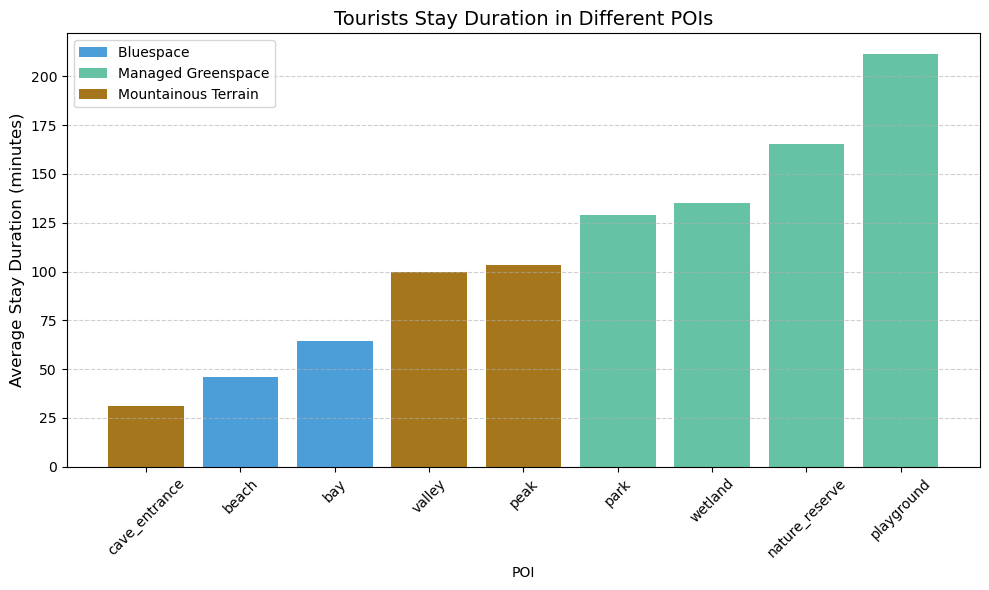

In [38]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

color_mapping = {
    "beach": "#4C9ED9",          
    "bay": "#4C9ED9",            
    "wetland": "#66C2A5",        
    "park": "#66C2A5",           
    "playground": "#66C2A5",     
    "nature_reserve": "#66C2A5", 
    "peak": "#A6761D",           
    "valley": "#A6761D",         
    "cave_entrance": "#A6761D",  
}


avg_stay_duration_sorted = avg_stay_duration.sort_values(by="average_stay_duration_min", ascending=True)


colors = avg_stay_duration_sorted["poi_subtype"].map(color_mapping)


plt.figure(figsize=(10, 6))
plt.bar(avg_stay_duration_sorted["poi_subtype"], avg_stay_duration_sorted["average_stay_duration_min"], color=colors)


legend_elements = [
    Patch(facecolor="#4C9ED9", label="Bluespace "),
    Patch(facecolor="#66C2A5", label="Managed Greenspace"),
    Patch(facecolor="#A6761D", label="Mountainous Terrain")
]

# 6. 图形美化
plt.xlabel("POI")
plt.ylabel("Average Stay Duration (minutes)", fontsize=12)
plt.title("Tourists Stay Duration in Different POIs", fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(handles=legend_elements, fontsize=10, title_fontsize=11)

plt.tight_layout()
plt.show()
